In [1]:
# 此文件实现了对Iris数据集的多种分类任务
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
def model_test(y_test, y_pred, average="weighted"):
  print("Precision:", metrics.precision_score(y_test, y_pred, average=average))
  print("Recall:", metrics.recall_score(y_test, y_pred, average=average))
  print("f1:", metrics.f1_score(y_test, y_pred, average=average))


def plot_mat(y_test, y_pred):
  mat = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [3]:
le = LabelEncoder()
# 导入数据集
car_df = pd.read_csv("car_val.csv")
for i in car_df.columns:
  car_df[i] = le.fit_transform(car_df[i])
#删除最后一列  样本数据
x = car_df.drop(columns=["class"])
#保存标签 结果数据
y = car_df["class"]
# x, y = datasets.load_(return_X_y=True)  # 能一次性取前2个
# print(x.shape, y.shape)

# 朴素贝叶斯

Precision: 0.7835209972352671
Recall: 0.7002314814814815
f1: 0.7224239114780404


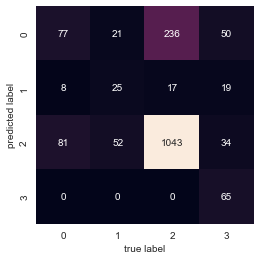

In [4]:
bayes_cls = bayes.GaussianNB()
y_pred = cross_val_predict(bayes_cls, x, y, cv=10)
model_test(y_pred, y)
plot_mat(y_pred, y)

# 逻辑回归

Precision: 1.0
Recall: 0.7002314814814815
f1: 0.8236895847515316


C:\Users\myide\.conda\envs\machineL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


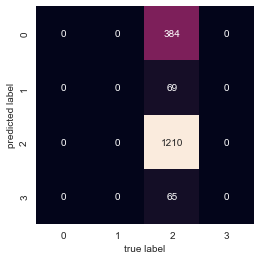

In [5]:
logistic_cls = LogisticRegression(solver='saga', tol=0.1)
y_pred_1 = cross_val_predict(logistic_cls, x, y, cv=10)
model_test(y_pred_1, y)
plot_mat(y_pred_1, y)

# SVM（高斯核）

Precision: 0.9058055993620883
Recall: 0.6678240740740741
f1: 0.7688118474364969


C:\Users\myide\.conda\envs\machineL\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


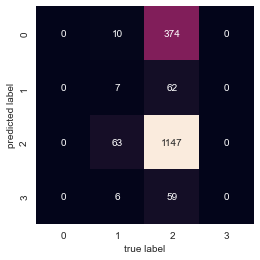

In [6]:
SVC_cls = SVC(kernel="rbf")
y_pred_2 = cross_val_predict(SVC_cls, x, y, cv=10)
model_test(y_pred_2, y)
plot_mat(y_pred_2, y)


# SVM（线性核）

Precision: 0.7810674703592502
Recall: 0.6747685185185185
f1: 0.7116861010941217


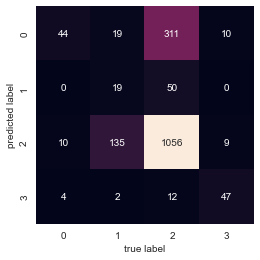

In [7]:
SVC_cls_1 = SVC(kernel="linear")
y_pred_3 = cross_val_predict(SVC_cls_1, x, y, cv=10)
model_test(y_pred_3, y)
plot_mat(y_pred_3, y)


# 决策树

Precision: 0.8490633322494735
Recall: 0.8478009259259259
f1: 0.8476794608739611


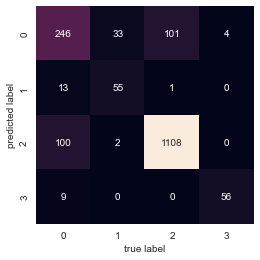

In [8]:
decision_cls = DecisionTreeClassifier()
y_pred_4 = cross_val_predict(decision_cls, x, y, cv=10)
model_test(y_pred_4, y)
plot_mat(y_pred_4, y)


# 随机森林

Precision: 0.7583961770011401
Recall: 0.7662037037037037
f1: 0.751254120786988


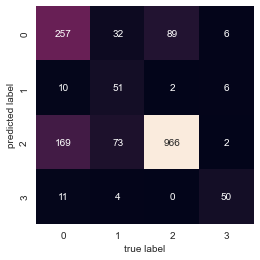

In [9]:
rand_forest_cls = RandomForestClassifier(n_estimators=10)
y_pred_5 = cross_val_predict(rand_forest_cls, x, y, cv=10)
model_test(y_pred_5, y)
plot_mat(y_pred_5, y)
